# Import

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

from keras.datasets import cifar10
from keras.layers import Input, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
import keras
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import BatchNormalization
from keras import layers
from keras.utils import plot_model
from keras.layers import Input, Flatten, Dense

1.15.0


# Loading the dataset

In [0]:
cifar10 = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Data Preprocessing

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

print("train_images.shape", train_images.shape)
print("length of train_labels",len(train_labels))

test_images=test_images[1:9985]
print("test_images.shape",test_images.shape)

test_labels=test_labels[1:9985]
print("length of test_labels",len(test_labels))

train_images.shape (50000, 32, 32, 3)
length of train_labels 50000
test_images.shape (9984, 32, 32, 3)
length of test_labels 9984


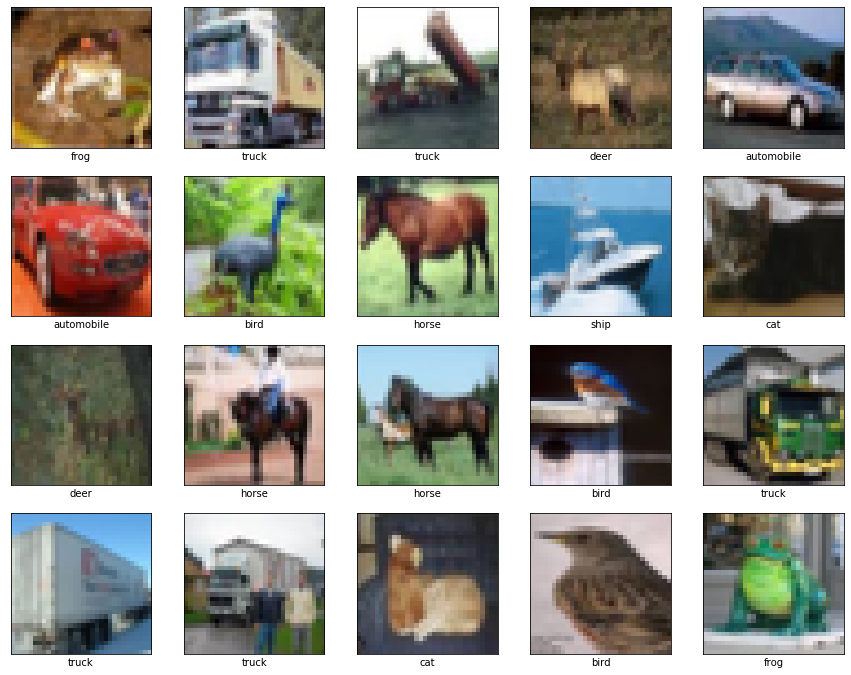

In [0]:
plt.figure(figsize=(15,15))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[int(train_labels[i])])
plt.show()

In [0]:
class_number = 10

train_labels = keras.utils.to_categorical(train_labels, class_number)
test_labels = keras.utils.to_categorical(test_labels, class_number)

print(train_labels.shape)

(50000, 10)


# CNN with Skip Connection

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_198 (Conv2D)             (None, 30, 30, 64)   1792        input[0][0]                      
__________________________________________________________________________________________________
activation_211 (Activation)     (None, 30, 30, 64)   0           conv2d_198[0][0]                 
__________________________________________________________________________________________________
conv2d_199 (Conv2D)             (None, 28, 28, 64)   36928       activation_211[0][0]             
____________________________________________________________________________________________

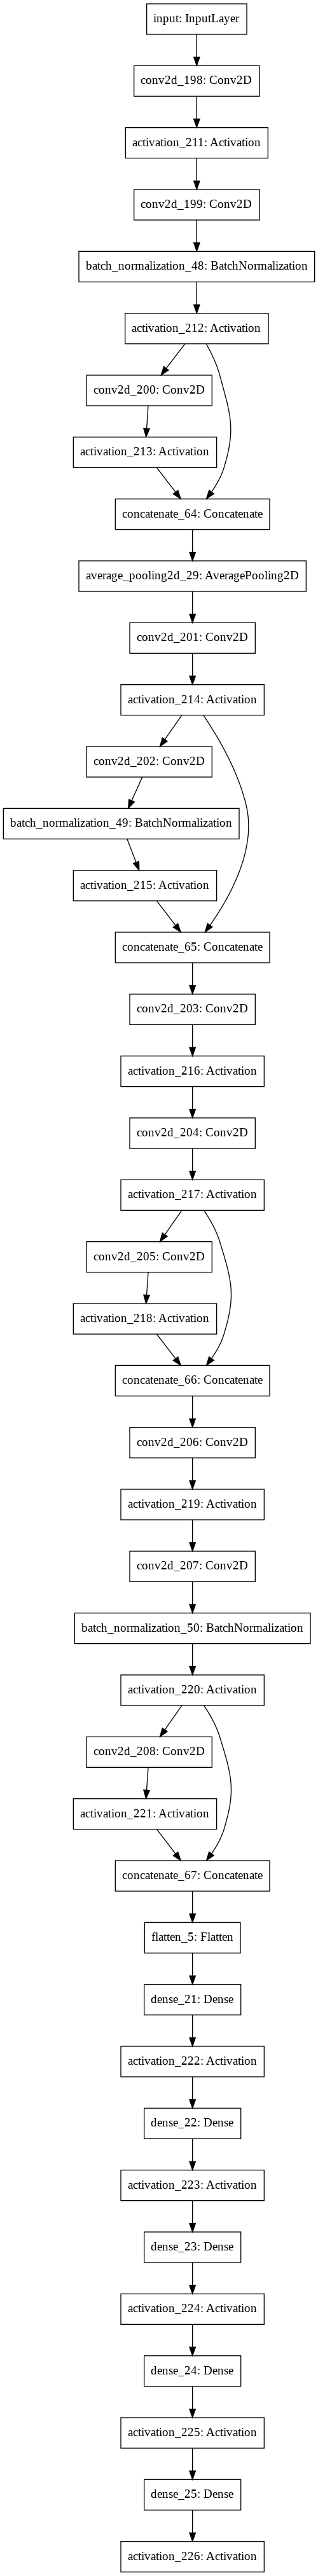

In [0]:

input = keras.layers.Input(shape=trainX.shape[1:],name = 'input')

#cnn_block 1

y = keras.layers.Conv2D(filters=64,kernel_size=(3,3))(input)


y1 = keras.layers.Conv2D(filters=64,kernel_size=(3,3))(x1)
y1_1 = BatchNormalization()(y1)
x2 = Activation('relu')(y1_1)

y2 = keras.layers.Conv2D(filters=64,kernel_size=(1,1))(x2)
x3 = Activation('relu')(y2)

x4 = layers.concatenate([x3,x2])

x4 = AveragePooling2D((2,2), padding='same')(x4)

#cnn_block 2

y = keras.layers.Conv2D(filters=512,kernel_size=(3,3))(x4)
x1 = Activation('relu')(y)

y1 = keras.layers.Conv2D(filters=512,kernel_size=(1,1))(x1)
y1_1 = BatchNormalization()(y1)
x2 = Activation('relu')(y1_1)

x4 = layers.concatenate([x2,x1])

#x4 = AveragePooling2D((2,2), padding='same')(x4)


#cnn_block 3

y = keras.layers.Conv2D(filters=128,kernel_size=(3,3))(x4)
x1 = Activation('relu')(y)

y1 = keras.layers.Conv2D(filters=128,kernel_size=(3,3))(x1)
x2 = Activation('relu')(y1)

y2 = keras.layers.Conv2D(filters=128,kernel_size=(1,1))(x2)
x3 = Activation('relu')(y2)

x4 = layers.concatenate([x3,x2])

#x4 = AveragePooling2D((2,2))(x4)

#cnn_block 4

y = keras.layers.Conv2D(filters=128,kernel_size=(3,3))(x4)
x1 = Activation('relu')(y)

y1 = keras.layers.Conv2D(filters=128,kernel_size=(3,3))(x1)
y1_1 = BatchNormalization()(y1)
x2 = Activation('relu')(y1_1)

y2 = keras.layers.Conv2D(filters=128,kernel_size=(1,1))(x2)
x3 = Activation('relu')(y2)

x4 = layers.concatenate([x3,x2])

#x4 = AveragePooling2D((2,2))(x4)

# mlp layer
      
x = Flatten()(x4)
x = Dense(4096)(x)
x = Activation('relu')(x)
x = Dense(512)(x)
x = Activation('relu')(x)
x = Dense(128)(x)
x = Activation('relu')(x)
x = Dense(128)(x)
x = Activation('relu')(x)
x = Dense(10)(x)
x = Activation('softmax')(x)

model = Model(inputs=input, outputs=x)

model.summary()

plot_model(model, to_file='model.png')

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
history = model.fit(train_images,train_labels,epochs=10,validation_split=0.1,shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 125s 3ms/step - loss: 1.3848 - acc: 0.4976 - val_loss: 1.4654 - val_acc: 0.4886
Epoch 2/10
45000/45000 [==============================] - 124s 3ms/step - loss: 1.1759 - acc: 0.5770 - val_loss: 1.1780 - val_acc: 0.5776
Epoch 3/10
45000/45000 [==============================] - 124s 3ms/step - loss: 1.0351 - acc: 0.6325 - val_loss: 1.1523 - val_acc: 0.5804
Epoch 4/10
45000/45000 [==============================] - 124s 3ms/step - loss: 0.9307 - acc: 0.6702 - val_loss: 1.0953 - val_acc: 0.6246
Epoch 5/10
45000/45000 [==============================] - 124s 3ms/step - loss: 0.8475 - acc: 0.7019 - val_loss: 0.9433 - val_acc: 0.6590
Epoch 6/10
45000/45000 [==============================] - 124s 3ms/step - loss: 0.7898 - acc: 0.7245 - val_loss: 1.1264 - val_acc: 0.6356
Epoch 7/10
45000/45000 [==============================] - 123s 3ms/step - loss: 0.7310 - acc: 0.7437 - val_loss: 1.0022 - v

In [0]:
def show_graph(history):
  plt.plot(history.history['loss'],color='blue',label='Train Loss')
  plt.plot(history.history['val_loss'],color='red',label='Valid Loss')
  plt.title('Loss')
  plt.legend()
  plt.xlabel('No. of epochs')
  plt.ylabel('Loss')
  plt.show()
  plt.plot(history.history['acc'],color='blue',label='Train Accuracy')
  plt.plot(history.history['val_acc'],color='red',label='Valid Accuracy')
  plt.legend()
  plt.title('Accuracy')
  plt.xlabel('No. of epochs')
  plt.ylabel('Accuracy')
  plt.show()

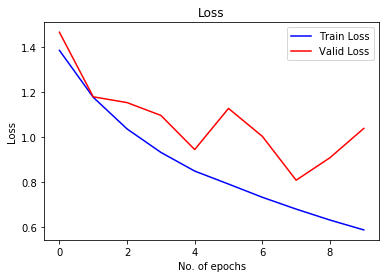

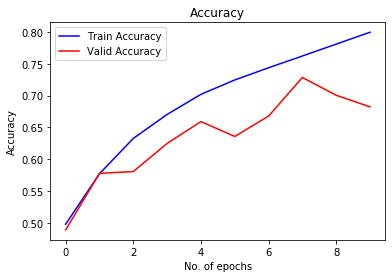

In [0]:
show_graph(history)

# Testing the Model

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

9984/9984 [==============================] - 6s 595us/step
Test accuracy: 0.6758814102564102


In [0]:
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))


[6.0584972e-07 6.8937894e-05 3.1768724e-10 2.6811945e-08 1.8955898e-14
 2.5600022e-10 6.0004273e-09 1.1315432e-11 9.9992692e-01 3.4079817e-06]
8


# Plotting the predictions

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

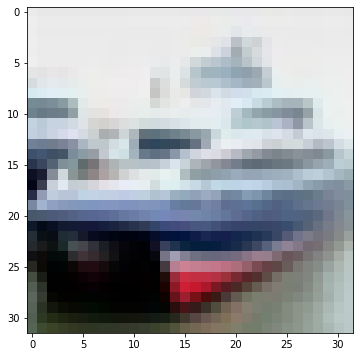

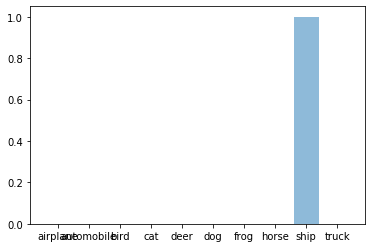

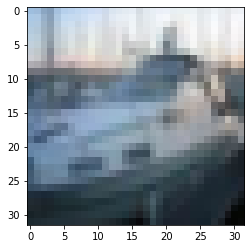

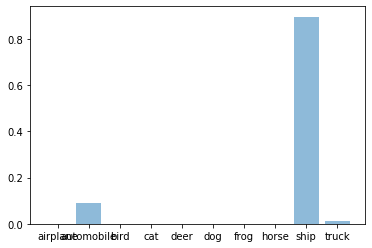

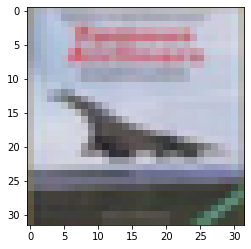

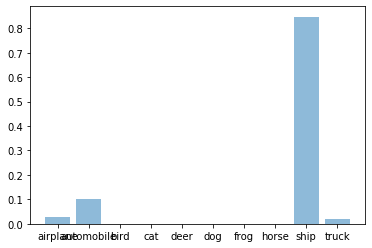

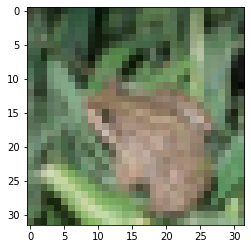

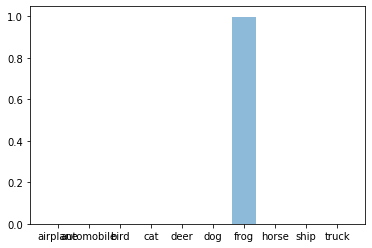

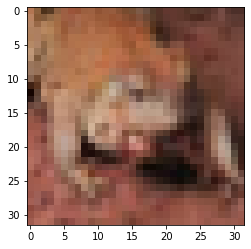

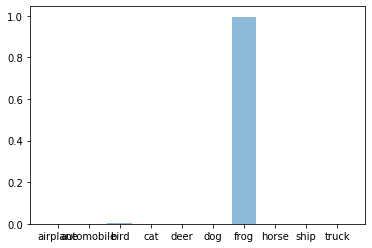

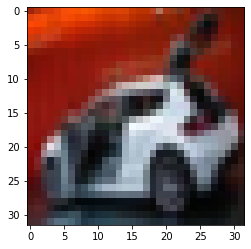

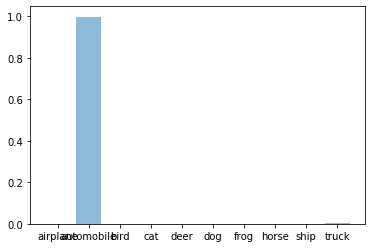

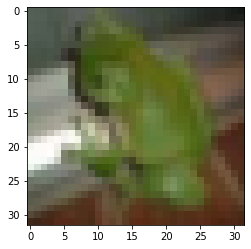

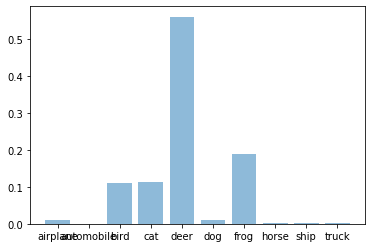

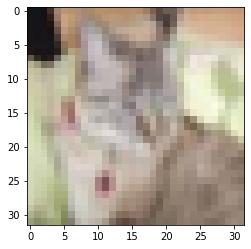

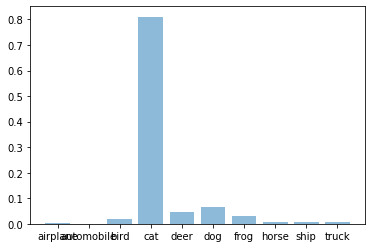

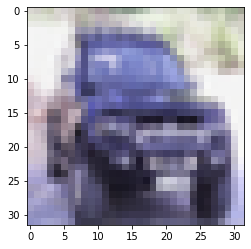

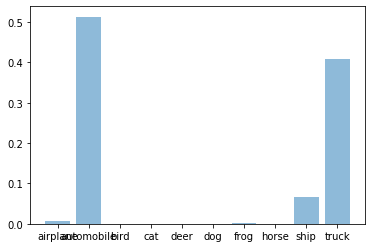

In [0]:

num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.imshow(test_images[i])
  plt.show()
  
  #print(predictions[i,:])
  plt.bar(class_names, predictions[i,:], align='center', alpha=0.5)
  plt.show()

